# N-dimensional Array using `NumPy`

```{admonition} Topics

- `NumPy` คืออะไร?
- การสร้าง `Numpy array`
- การประมวลผลทางคณิตศาสตร์กับ `Numpy array`
- การเข้าถึงข้อมูลใน `Numpy array`
- การประมวลผลแบบ Matrix ด้วย `Numpy`

```

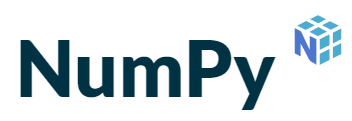

`Numpy` คืออะไร?
- ไลบรารี(หรือแพ็กเกจ)สำหรับการประมวลผลข้อมูลในรูปแบบของ **`array` หลายมิติ**ในภาษา Python
- เป็นแพ็กเกจพื้นฐานที่ใช้ในการพัฒนาไลบรารีอื่น ๆ สำหรับการประมวลผลด้าน**วิทยาการข้อมูล (Data science)**
- นิยมใช้ประมวลผลข้อมูล **Matrix** และการคำนวณอื่น ๆ **ด้านคณิตศาสตร์**
- Data type พื้นฐานของ `NumPy` เรียกว่า **`NumPy array`** ใช้ในการจัดเก็บข้อมูลสำหรับการประมวลผลต่าง ๆ ด้วย `NumPy`



## จุดเด่นของ NumPy

- **Speed**: มีการทำงานที่รวดเร็วมากกว่าการประมวลผลข้อมูลที่จัดเก็บด้วย List ของ Python อย่างมาก
- **Fewer loops**: ลดการใช้งานคำสั่งเกี่ยวกับ Loop ของ Python
- **Clearer code**: โค้ดที่ใช้งานจะมีความสอดคล้องกับการคำนวณทางคณิตศาสตร์มากกว่าการใช้ Python โค้ดโดยทั่วไป
- **Better quality**: โค้ดของ NumPy เกิดจากการมีส่วนร่วมของผู้เชี่ยวชาญมากมาย


ก่อนใช้งาน `NumPy` ต้องเริ่มด้วยการ import โมดูลนี้ก่อนโดยใช้คำสั่ง `import` ดังนี้

In [ ]:
import numpy as np

เราสามารถตรวจสอบ `version` ของ `NumPy` ที่ติดตั้งในระบบของเราโดยใช้คำสั่งต่อไปนี้

In [ ]:
print(np.__version__)

---
## ประสิทธิภาพของ NumPy

การเปรียบเทียบประสิทธิภาพในการนำค่าเลข `1` บวกเข้าไปยังแต่ละ item ของข้อมูลในลิสต์ `[0,1,2,3,...,9999]`โดยใช้ **List comprehension** และ **NumPy**

**คำนวณหาเวลาเฉลี่ยต่อรอบการทำงาน** (โดยจะทำการรัน 5 ครั้ง แต่ละครั้งจะรันคำสั่ง 1000 รอบ)

In [ ]:
# ใช้ List comprehension
%timeit -r5 -n1000 [i+1 for i in range(10_000)]

In [ ]:
# Numpy's np.arrange
%timeit -r5 -n1000 np.arange(10_000)+1

```{warning}
ในการพัฒนาโปรแกรมโดยใช้ไลบรารี(หรือแพ็จเกจ)ต่าง ๆ เช่น `Matplotlib`,`NumPy` อาจพบปัญหาว่า **โค้ดที่พัฒนาขึ้นด้วยแพ็กเกจ version เก่า อาจเกิดข้อผิดพลาดหากถูกนำไปรันในระบบที่ใช้งานแพ็กเกจ version ที่ใหม่กว่า** เพราะบางฟังก์ชันที่เคยใช้งานอาจถูกตัดออกไปในแพ็กเกจ version ใหม่
```




## การสร้าง NumPy array

เราสามารถใช้ฟังก์ชัน `.array()` ในการ**สร้าง NumPy array จากข้อมูล List** ที่เราส่งให้กับฟังก์ชัน โดย List ที่ส่งให้ฟังก์ชันอาจมีจำนวน **`dimension` มากกว่า 1 มิติก็ได้**

```python
np_array_variable = np.array(...)
```



**ตัวอย่าง**

- `x1` จะเป็น array แบบ **1 มิติ**
- `x2` จะเป็น array แบบ **2 มิติ**

In [ ]:
x1 = np.array([1,2,3,4,5,6])                      # 1D array
x2 = np.array([[1,2,3],[11,22,33],[10,20,30]])    # 2D array, dimension: 3x3

เมื่อพิมพ์ตัวแปร array ด้วยคำสั่ง `print()` จะมีการจัดรูปแบบการแสดงผลที่ปราศจากเครื่องหมาย `comma ","` และถ้าเป็นข้อมูลหลายมิติ ก็จะมีขึ้นบรรทัดใหม่สำหรับข้อมูลแต่ละ row จึงทำให้เข้าใจข้อมูลได้ง่าย่กว่า (เมื่อเทียบกับ Python List)

In [ ]:
print('---Print numpy arrays:---')
print(f"x1 1D-array: \n{x1}")
print(f"x2 2D-array: \n{x2}")

print('\n------Print 2D list------')
y =[[1,2,3],[11,22,33],[10,20,30]]
print(f"y 2D-List: \n{y}")

### การตรวจสอบขนาด และชนิดของข้อมูลที่จัดเก็บ

หากต้องการทราบขนาดในแต่ละมิติของข้อมูล NumPy array สามารถเช็คค่าคุณสมบัติ (property) `.shape` ได้ โดยผลลัพธ์จะแสดงขนาดในแต่ละมิติในรูปแบบของ `Tuple`




**ตัวอย่าง**

In [ ]:
# NumPy ".shape" property
print(f"x1.shape: {x1.shape}")   # 1D array
print(f"x2.shape: {x2.shape}")   # 2D array

In [ ]:
# Python List
# print(y.shape)  >> error
rows = len(y)     # ขนาดในมิติแรก (นอกสุด)
cols = len(y[0])  # ขนาดในมิติที่ 2
print(rows,cols)

```{warning}

 **ความแตกต่างของ `function` กับ `property`** 
 
 จากที่ได้เคยเรียนรู้กันมาแล้วว่า ใน **Data type ที่มีความซับซ้อน** เช่น **NumPy array**, **String**, **List**, **Tuple**, ... (และอีกมากมาย) นอกจากจะสามารถใช้จัดเก็บข้อมูลได้แล้ว ตัวแปรของ Data type เหล่านี้จะมีความสามารถติดตัวมาด้วยในรูปแบบของ **`function`** ต่าง ๆ เช่น

- `.upper()` ของ String : ใช้แปลงตัวอักษรให้เป็นตัวใหญ่ (capital letter)
- `.append()` ของ List : ใช้เพิ่ม item ใหม่ต่อท้ายลิสต์
- `.array()` ของ NumPy array : ใช้สร้าง NumPy array จากข้อมูลที่ส่งให้

ซึ่งในการเรียกใช้งานฟังก์ชันจะ**ต้องเติม `วงเล็บ '()'` ท้ายชื่อฟังก์ชัน** เพื่อให้เราสามารถส่งข้อมูลต่าง ๆ ให้ฟังก์ชันได้

แต่ **`property`** คือคุณสมบัติของ Data type บางประเภท ที่**บ่งบอกสถานะปัจจุบันของข้อมูลที่ถูกจัดเก็บ** เช่น

- `.shape` ของ NumPy array : บอกขนาดของข้อมูลในแต่ละมิติ
- `.dtype` ของ NumPy array : บอกชนิดของข้อมูลที่ถูกจัดเก็บ

ซึ่งในการใช้งาน **ไม่ต้องมีวงเล็บ () ต่อท้ายชื่อของ property**

```

**ตัวอย่าง**

สังเกตุความแตกต่างระหว่าง **1D array ที่มี 5 item** กับ **2D array ที่มีขนาด 1x5 item**

In [ ]:
a1 = np.array([4,2,1,3,2])    # 1D array
a2 = np.array([[4,2,1,3,2]])  # 2D array
print('x1.shape =', a1.shape)
print('x2.shape =', a2.shape)

## Data type ของข้อมูลที่เก็บใน `Numpy array`


ข้อมูลทุก item ที่จัดเก็บใน `Numpy Array` เดียวกัน **ต้องมีชนิดข้อมูล (data type) แบบเดียวกัน** ซึ่งนี่คือจุดที่ต่างจาก `Python List`

ในกรณีที่พยายามสร้าง array จากข้อมูลต่างชนิดกัน **NumPy จะพยายามแปลงข้อมูลทุกตัวให้เป็นชนิดเดียวกันโดยอัตโนมัติ**


**ตัวอย่าง**

In [ ]:
a = np.array([1,2])             # int
b = np.array([1,2.0])           # float
c = np.array(['apple',20])      # string

print(f"{a} data type: {a.dtype}")
print(f"{b} data type: {b.dtype}")
print(f"{c} data type: {c.dtype}")

## การสร้าง `Numpy array` ด้วย `np.zeros()` และ `np.ones()`

เราสามารถสร้าง Array ที่มีสมาชิกทุกตัวเป็น `0` หรือ `1` ได้ด้วยฟังก์ชัน `.zeros()` และ `.ones()` ตามลำดับ

ข้อมูลที่ต้องป้อนให้กับฟังก์ชันคือ `shape` ของ Array ที่ต้องการ โดยต้องกำหนดค่าในรูปแบบของ `Tuple` เช่น

- `(15,)`: 1D-array ที่มีสมาชิกทั้งหมด 15 item
- `(2,4)`: 2D-array ขนาด 2 แถว x 4 คอลัมน์
- `(3,3,3)`: 3D-array ขนาด 3x3x3

**ตัวอย่าง**

In [ ]:
a = np.zeros((10,))
b = np.ones((5,2))
c = np.zeros((2,5))
d = np.ones((2,3,4))
print(a)
print(b)
print(c)
print(d)

## การสร้าง Identity array

ในการคำนวณทางคณิตศาสตร์ด้านเมตริกซ์ (Matrix) มักจะมีการใช้งาน identity matrix ซึ่งเราสามารถสร้าง **identity matrix** ได้โดยใช้ฟังก์ชัน `.identity()` โดยส่งค่า `int` ที่ระบุขนาดของเมตริกซ์นี้

**ตัวอย่าง**

In [ ]:
A = np.identity(5)
print(A)

## การสร้างรายการข้อมูลตัวเลขทศนิยมด้วย `np.arange()`

ฟังก์ชัน `range()` สามารถสร้างได้เฉพาะรายการข้อมูลเลข**จำนวนเต็ม (int)**

In [ ]:
# พยายามใช้ range() สร้าง List ของข้อมูลแบบ float - error
x = range(1,11,0.5)
print(list(x))

ถ้าต้องการสร้าง**รายการข้อมูลเลขทศนิยม (float)** สามารถใช้ฟังก์ชัน `.arange()` ของ NumPy ได้ โดยผลลัพธ์ที่ได้จะอยู่ในรูปของ `Numpy array` นั่นเอง

ข้อมูลที่ต้องส่งให้ฟังก์ชันได้แก่ `(start,stop,step)` เช่นกัน เพียงทั้ง 3 ค่า สามารถกำหนดให้เป็นค่า `float` ได้

In [ ]:
# NumPy's arange()
x = np.arange(1,11,0.5)

print(x); print()

print(x**2+2*x+1); print()

print(type(x))

## การประมวลผลทางคณิตศาสตร์กับ Numpy array





### การคำนวนระหว่างข้อมูลแบบ `number` กับ `NumPy array`

ข้อดีประการหนึ่งของการใช้ `NumPy` คือ ความสามารถในการคำนวณทางคณิตสามารถกับ array

โดยเมื่อนำ **array ของตัวเลข** ไปทำการคำนวณกับ**ข้อมูลตัวเลข (int, float) เดี่ยว ๆ**ได้ โดยใช้ operator ทางคณิตศาสตร์ เช่น

In [ ]:
x = np.arange(1,10,0.5)
y = x*10        # y = 10x
z = 3*x**2      # z = 3x^2

print(x)
print(y)
print(z)

ผลลัพธ์ที่ได้ คือ array ที่เก็บผลของ**การกระจายการคำนวณเข้าไปยังสมาชิกแต่ละ item ใน array นั่นเอง**
- `y` จะเก็บผลลัพธ์ของการนำสมาชิกแต่ละตัวของ `x` ไปคูณด้วยเลข `10`
- `z` จะเก็บผลลัพธ์ของการนำสมาชิกแต่ละตัวของ `x` ไปยกกำลัง `2` แล้วเอาไปคูณด้วย `3`




### การคำนวนระหว่างข้อมูลแบบ `Numpy array` กับ `NumPy array` ที่มีขนาดเท่ากัน

ในกรณีที่เราใช้ operator ทางคณิตศาสตร์กับ array ของข้อมูลซึ่ง**มี `shape` เหมือนกัน** ผลลัพธ์ที่ได้คือ**การนำ item ในตำแหน่งเดียวกันของ array แต่ละตัวมาคำนวณด้วย operator** นั้น ๆ

In [ ]:
# 1D array
x1 = np.array([1,2,3,4])
x2 = np.array([5,4,3,2])

print(x1 + x2)
print(x1 - x2)
print(x1 * x2)
print(x1 / x2)
print(x1 // x2)
print(x1 % x2)
print(x1 ** x2)

In [ ]:
# 2D array
x1 = np.array([[1,2,3],[4,1,0]])
x2 = np.array([[5,4,3],[2,2,1]])

print(x1 + x2); print()
print(x1 - x2); print()
print(x1 * x2); print()
print(x1 / x2); print()
print(x1 // x2); print()
print(x1 % x2); print()
print(x1 ** x2)

```{warning}
**Warning - `item-wise` multiplication**: การนำ array สองตัวมาคูณกัน หรือการนำ array ไปคูณกับตัวเลข(เดี่ยว)ด้วย `*` operator ในตัวอย่างด้านบน ผลลัพธ์ที่ได้คือ array ของผล**การคูณ**ของ item ในตำแหน่งเดียวกัน (item-wise)  **ไม่ได้เป็นการคูณของเมตริกซ์ (matrix multiplication) ตามหลักทางคณิตศาสตร์**
```
 


## การคำนวนระหว่างข้อมูลแบบ `Numpy array` กับ `NumPy array` ที่มีขนาดไม่เท่ากัน

**Broadcasting**

การที่ NumPy จะสามารถกระจายการคำนวณเข้าไปใน array ได้หรือไม่ ขึ้นอยู่กับว่า `shape` ของ array สอดคล้องกับกฎเกณฑ์ของการ broadcasting หรือไม่


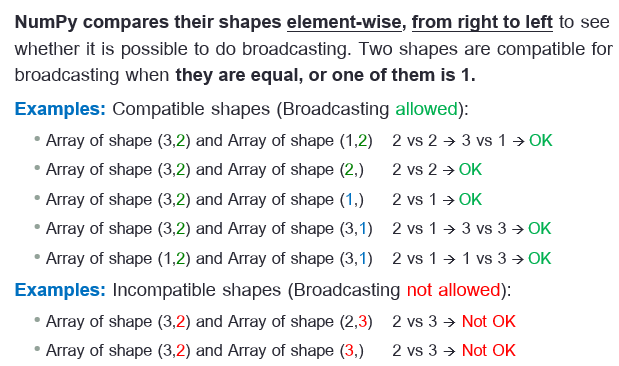


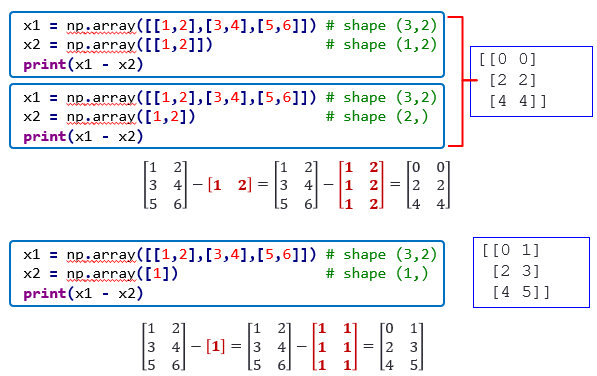


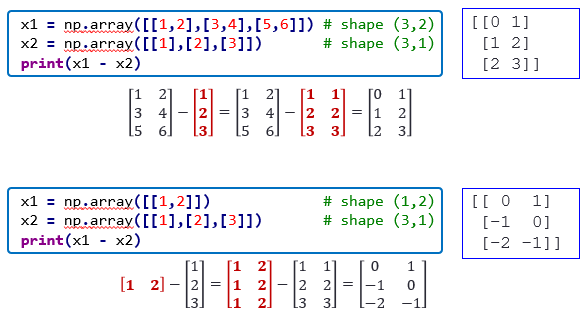


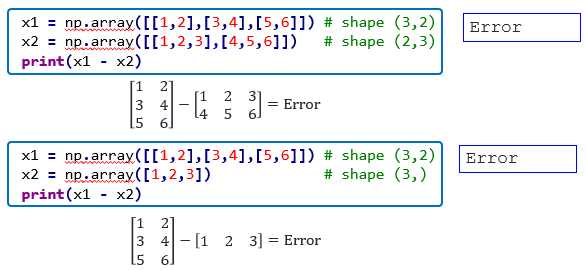

In [ ]:
# broadcasting error
x1 = np.array([[1,2],[3,4],[5,6]]) # shape (3,2)
x2 = np.array([[1,2,3],[4,5,6]])   # shape (2,3)
print(x1 - x2)

## ฟังก์ชันทางคณิตศาสตร์ของ NumPy

เนื่องจากฟังก์ชันทางคณิตศาสตร์ใน **`math` โมดูลไม่รองรับการทำงานร่วมกับ List** ทำให้ต้องใช้ Loop หรือ List comprehension ในการช่วยประมวลผลข้อมูลแต่ละ item แทน ซึ่งไม่ค่อยมีประสิทธิภาพ

**ดัวอย่าง**

In [ ]:
import math

# พยายามใช้ math.log() กับข้อมูลที่เป็น List
# ทำให้เกิด error
x = [1, np.e, np.e**2]
print( math.log(x) )

In [ ]:
y = []
for item in x:
  y.append( math.log(item) )

print(y)

In [ ]:
y = [math.log(item) for item in x]
print(y)

**NumPy** มาพร้อมกับฟังก์ชันมากมายสำหรับการคำนวณทางคณิตศาสตร์ (คล้ายกับ math แพ็กเกจ) โดยใช้ประมวลผล NumPy array จะเป็นการ**กระจายการคำนวณเข้าไปยังสมาชิกแต่ละ item ภายใน array** เช่นเดียวกับ math operator

ตัวอย่างฟังก์ชันทางคณิตศาสตร์ของ NumPy เช่น `np.cos()` `np.arccos()` `np.log()` `np.sqrt()` หรือค่าคงที่ เช่น `np.pi` `np.e` เป็นต้น

**ตัวอย่าง**

In [ ]:
a = np.array([1, np.e, np.e**2])
print( np.log(a) )

b = np.array([0, np.pi/2, np.pi*3/4])
print( np.sin(b) )

In [ ]:
x = np.arange(0,10,0.25)
y = np.sin(x)

print(x)
print(y)

In [ ]:
x = np.arange(1,10,0.5)
y = np.log(np.e*x)    # y = ln(e*x)

print(x)
print(y)

## ฟังก์ชันทางสถิติของ NumPy

NumPy มีฟังก์ชันพื้นฐานทางสถิติหลายฟังก์ชัน ได้แก่ `np.sum()` `np.mean()` `np.max()` `np.min()` `np.var()` `np.std()`

ในกรณีที่เป็น array แบบ 2 มิติ (ตาราง หรือเมตริกซ์) การคำนวณทางสถิติยังสามารถแยกประมวลผลเฉพาะสำหรับแต่ละ row หรือแต่ละ column ก็ได้ ขึ้นอยู่กับการกำหนดค่า `axis` option

- `axis=0` : ประมวลผลในแนว column (แนวตั้ง)
- `axis=1` : ประมวลผลในแนว row (แนวนอน)



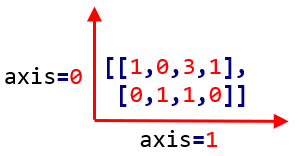


**ตัวอย่าง**

In [ ]:
x = np.array([[1,5,3,1],
              [0,1,2,9]])

print(x); print()
print(f"np.sum(x): {np.sum(x)}")                    # sum of all axes

print(f"np.sum(x, axis=0): {np.sum(x, axis=0)}")    # column sum
print(f"np.sum(x, axis=1): {np.sum(x, axis=1)}")    # row sum

In [ ]:
print(f"np.max(x): {np.max(x)}")

print(f"np.max(x, axis=0): {np.max(x, axis=0)}")
print(f"np.max(x, axis=1): {np.max(x, axis=1)}")

## การเข้าถึงข้อมูลใน `Numpy array`



### การเข้าถึงข้อมูลใน array ด้วย index และการ slice

เช่นเดียวกับ Python List เราสามารถเข้าถึงข้อมูลภายใน array  โดยการอ้างอิงตำแหน่งด้วยค่า `index` ของ item ที่ต้องการ ในรูปแบบ **`array[index]`**

หากต้องการเข้าถึงช่วงของข้อมูลภายใน array ก็สามารถใช้ **slicing** โดยการกำหนดค่า `index` ในรูปแบบของ **`array[start:stop:step]`**

**ตัวอย่าง**

In [ ]:
x = np.array([5,6,7,8,9,10])

print(x[0])
print(x[1:3])
print(x[2:])
print(x[1:5:2])
print(x[::2])
print(x[::-1])  # reverse

In [ ]:
x = np.array([5,6,7,8,9,10])

x[1] = 1
print(x)

x[2:] = 0
print(x)

ในกรณีที่เป็น **array แบบหลายมิติ** เราสามารถระบุค่า `index` ในมิติอื่น ๆ เพิ่มเติมได้

In [ ]:
x = np.array([[5,6,7],[8,9,10]])
print(x[1,2])
print(x[1][2])

**ตัวอย่าง**

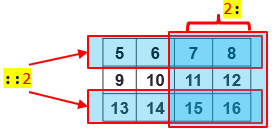

In [ ]:
x = np.array([
    [ 5, 6, 7, 8],
	  [ 9,10,11,12],
	  [13,14,15,16]])

print(x); print()
print(x[::2,2:])

**ตัวอย่าง**

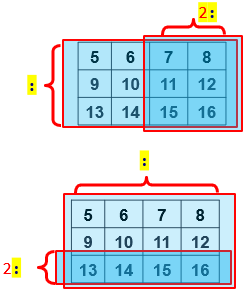

In [ ]:
x = np.array([
    [ 5, 6, 7, 8],
	  [ 9,10,11,12],
	  [13,14,15,16]])

print(x[:,2:]); print()
print(x[2:,:])

**ตัวอย่าง**

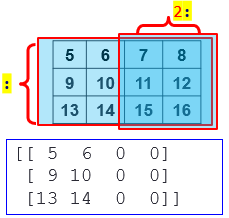

In [ ]:
# assign values
x = np.array([
    [ 5, 6, 7, 8],
	  [ 9,10,11,12],
	  [13,14,15,16]])

print(x); print()
x[:,2:] = 0
print(x)

## การเลือกข้อมูลใน array ด้วยเงื่อนไข

การเลือกข้อมูลใน `Numpy array` ด้วยเงื่อนไข (condition) ประกอบด้วย 2 ขั้นตอน คือ

1.   การสร้าง `selector array`
2.   การนำ `selector array` ไปใช้เป็น `index`ในการเลือกข้อมูล



### 1. การสร้าง `selector array`

`selector array` คือ `array` ที่บ่งบอกตำแหน่งของ**ข้อมูลเป็นไปตามเงื่อนไขที่กำหนด**

โดยสร้างได้จากการใช้ **`comparison operator` ได้แก่ `>,>=,<,<=,==,!=`** ร่วมกับ `Numpy array` ที่เก็บข้อมูลซึ่งเราสนใจ


ผลลัพธ์ที่ได้ คือ array ของค่า `boolean` ที่มีขนาดเท่ากับขนาดของข้อมูลตั้งต้น:
- **`True`** : เมื่อค่า item ในตำแหน่งนั้น**เป็นไปตามเงื่อนไข**
- **`False`** : เมื่อค่า item ในตำแหน่งนั้น**ไม่เป็นไปตามเงื่อนไข**

**ตัวอย่าง**

In [ ]:
x = np.array([
    [ 5, 6, 7, 8],
    [ 9,10,11,12],
    [13,14,15,16]])
print(x)

y = (x > 10)  # สร้าง selector array ของข้อมูล item ที่มีค่ามากกว่า 10

print("\nSelector array y: (x>10)")
print(y)

### 2. การนำ `selector array` ไปใช้เป็น `index` ในการเลือกข้อมูล

เราสามารถใช้ `selector array` แทนค่า `index` เพื่อเลือกเฉพาะ item ที่เป็นไปตามเงื่อนไข ในรูปแบบ `array[selector-array]`

**ตัวอย่าง**

In [ ]:
# เลือกเฉพาะข้อมูลในตำแหน่งที่เป็นไปตามเงื่อนไข item>10
print( x[y] )
print( type(x[y]) )

In [ ]:
# การกำหนดค่าใหม่ ให้กับข้อมูลในตำแหน่งที่เป็นไปตามเงื่อนไข item>10
x[y] = 100
print( x )

**ตัวอย่าง**

In [ ]:
x2 = np.array([[1,2,3],[11,22,33],[10,20,30],[100,200,300]])
print(x2)
print(x2.shape)

In [ ]:
y = (x2<=10)              # สร้าง selector array, ข้อมูลตำแหน่งใดบ้างที่ <=10
print(y)

In [ ]:
print(x2[y])              # nd-array[ selector_array ]

print(np.sum(x2[y]))      # หาผลรวม ของข้อมูลที่เป็นไปตามเงื่อนไข
print(np.mean(x2[y]))     # หาค่าเฉลี่ย ของข้อมูลที่เป็นไปตามเงื่อนไข

print(x2[y]*3)            # นำ 3 ไปคูณเฉพาะข้อมูลที่เป็นไปตามเงื่อนไข

In [ ]:
x2[y] *= 100              # กำหนดค่าใหม่ ให้กับข้อมูลในตำแหน่งที่เป็นไปตามเงื่อนไข
print(x2[y])              # y ยังคงเก็บรายการ ตำแหน่ง ของข้อมูลจากเงื่อนไขเดิม
print(x2)

**ตัวอย่าง**

ในบรรทัด (row) ใดที่มีค่าในคอลัมน์ที่ 1 มีค่าเท่ากับ `1`, ให้หาผลรวมของข้อมูลในคอลัมน์ที่ 2 และ 4

In [ ]:
x = np.array([[ 1, 10, 1, 3, 5],
              [ 1, 15, 2, 3, 5],
              [ 0, 20, 3, 3, 5],
              [ 1, 25, 4, 3, 5]])

# row ใดบ้างที่มีค่าในคอลัมน์แรกเท่ากับ 1
# x[:,0] เลือกข้อมูลในทุก row ของคอลัมน์แรก
row_selector = (x[:,0] == 1)
print(row_selector)

In [ ]:
sub_x = x[:, [2,4]]           # เลือกข้อมูลทุก row ในคอลัมน์ที่ 2 และ 4 จาก array เริ่มต้น
print(sub_x)

In [ ]:
# ใช้ row_selector เพื่อเลือกเฉพาะ row ที่ตรงกับเงื่อนไข
# สำหรับแต่ละ row ที่เลือก หาผลรวม (sum) ในแนวคอลัมน์ (axis=0)
total = np.sum(sub_x[row_selector, :], axis=0)
print(total)

## View และ Copy

**การสร้างตัวแปรใหม่ โดยเลือกข้อมูลจาก array ที่มีอยู่แล้ว** ด้วยการใช้ **index** และ **slice** คือการสร้าง **`View`** ของข้อมูล

หากมี**การแก้ไขค่าตัวแปรใหม่(View)** จะทำให้ข้อมูลใน array ตนทางเปลี่ยนแปลงตามไปด้วย

In [ ]:
x = np.ones((3,3))
print(x)

y = x[:2,:2] 	      # สร้าง view ด้วยการ slice
print(y)

x[0,0] = 0
print(x)
print(y)

เพื่อให้ค่าในตัวแปรใหม่แยกออกจาก array ต้นทางอย่างเด็ดขาด เราสามารถใช้ฟังก์ชัน `.copy()` ในการสร้าง copy ใหม่ของข้อมูลได้

**ตัวอย่าง**

In [ ]:
x = np.ones((3,3))
y = x[:2,:2].copy() 	      # สร้าง copy ใหม่จากข้อมูลที่ slice ออกมา
print(y)

x[0,0] = 0
print(x)
print(y)

## การคำนวณ Matrix


### Matrix Multiplication

ตามหลักคณิตศาสตร์ การคูณกันแบบเมตริกซ์จะได้ผลดังที่แสดงดังรูปต่อไปนี้


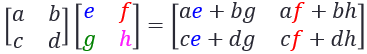


เราสามารถใช้ `@` operator หรือใช้ฟังก์ชัน `.dot()` สำหรับการคูณ array ในแบบเมตริกซ์ (สำหรับ Python เวอร์ชัน 3.5 ขึ้นไป) ทั้งนี้ array ที่นำมาคูณกันแบบเมตริกซ์ต้องมี `shape` ที่สอดคล้องกันด้วย

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[1,1],[1,1]])
print(x)
print(y)

In [ ]:
print(x*y)            # item-wise multiplication (คูณข้อมูลในตำแหน่งเดียวกัน)

print(x@y)            # Matrix multiplication (คูณกันแบบ matrix)
print(np.dot(x,y))

### Matrix Transposition

สำหรับการทำ Transpose สามารถทำได้โดยการเรียกใช้ **`.T`**

In [ ]:
x = np.array([[1, 2, 3],[4, 5, 6]])
print( x, x.shape )

y = x.T
print( y, y.shape )

```{warning}
การทำ Transpose กับ 1D-array จะได้ผลลัพธ์เป็น 1D-array เหมือนเดิม
```

In [ ]:
x = np.array([1, 2, 3])
print(x, x.shape)

y = x.T
print(y, y.shape)

```{warning}
ผลลัพธ์จากการ Transpose ถือเป็น View เช่นกัน ถ้ามีการเปลี่ยนแปลงค่าจะส่งผลไปยัง array ตั้งต้นด้วย
```

In [ ]:
x = np.array([[1, 2, 3]])
print( x )

y = x.T         # สร้าง view จากการ Transpose
y[0,0] = 100    # แก้ไข view
print( x )      # array ต้นทางเปลี่ยนค่าตามไปด้วย

### Linear Algebra Module

NumPy มีโมดูลย่อย **`np.linalg`** สำหรับการคำนวณด้านพีชคณิตเชิงเส้น โดยมีฟังก์ชันให้ใช้งาน เช่น `np.linalg.det()` `np.linalg.inv()` `np.linalg.solve()`

In [ ]:
x = np.array([[1,2],[3,4]])
print(x)

print()
print(np.linalg.det(x)) # determinant

print()
print(np.linalg.inv(x)) # inversion

### การแก้สมการหลายตัวแปร

ในกรณีที่ต้องการแก้สมการหลายตัวแปร เราสามารถประยุกต์ใช้ความรู้ด้านเมตริกซ์มาช่วยแก้ปัญหา โดยการแปลงรูปสมการให้อยู่ในรูปเมตริกซ์ในรูปแบบดังต่อไปนี้

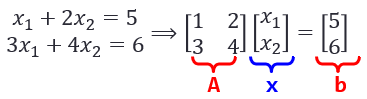


เราสามารถเขียนโค้ดเพื่อแก้ปัญหาเพื่อหาค่า `x1` และ `x2` ได้ดังนี้

In [ ]:
A = np.array([[1,2],[3,4]])   # 2D array
b = np.array([5,6])           # 1D array

x = np.linalg.solve(A,b)      # ใช้ฟังก์ชัน linalg.solve() ในการหาคำตอบ
print(x)

x = np.linalg.inv(A) @ b      # หาคำตอบโดยคำนวณหาค่าของ A-inverse @ b
print(x)